In [10]:
import numpy as np
import scipy as sp

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.datasets import load_iris, load_sample_image
from sklearn.cluster import AgglomerativeClustering, KMeans, kmeans_plusplus
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from numpy.linalg import svd

In [11]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_ubyte,img_as_float

In [12]:
image1 = rgb2gray(img_as_float(data.coffee()))

In [13]:
image1.shape

(400, 600)

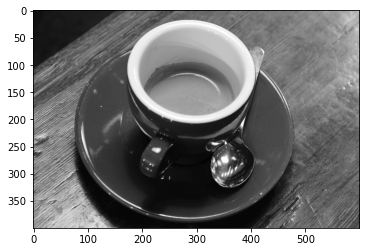

In [14]:
plt.imshow(image1, cmap='gray')

##### Using SVD

Collect the top few singular values to represent image. That is, using lesser information to present the (almost) same image >Compression

> With the help of SVD, we can compress the image by using only the top few singular values. The top few singular values are the most important ones and they are responsible for the most of the information in the image. So, we can use only the top few singular values to represent the image. This will reduce the size of the image and hence we can compress the image.


>  If the original image matrix is of size n x p, then the SVD of the matrix will be of the form UΣV^T. The matrix Σ is a diagonal matrix, the p diagonal elements of Σ are the singular values of the matrix. The matrix U is of size n x n and the matrix V is of size p x p. The columns of the matrix U are the left singular vectors of the matrix and the columns of the matrix V are the right singular vectors of the matrix. We can pick the top few singular values and the corresponding left and right singular vectors to represent the image. The following code does that.


In [15]:
def svd_k(img, k):
    U,D,Vt = svd(img, full_matrices=False)
    mat = np.dot(U[:,:k],np.dot(np.diag(D[:k]),Vt[:k,:])) # collecting only top k SVs
    return mat, D, Vt

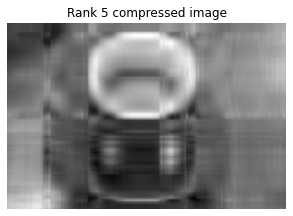

In [16]:
#
k  = 5
compressed_img , D, Vt = svd_k(image1, k)

fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

(400, 600)


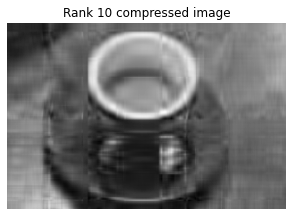

In [17]:
#
k  = 10
compressed_img , D, Vt = svd_k(image1, k)
print(compressed_img.shape)
fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

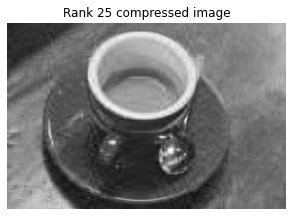

In [18]:
#
k  = 25
compressed_img , D, Vt = svd_k(image1, k)

fig,axes = plt.subplots(figsize=(5,5))
axes.set_title("Rank {:.0f}".format(k)+" compressed image")
axes.imshow(compressed_img,cmap='gray')
axes.axis('off')
plt.show()

#### Through KMeans

> Using KMeans, we can compress the image by using only the top few clusters. The top few clusters are the most important ones and they are responsible for the most of the information in the image. So, we can use only the top few clusters to represent the image. This will reduce the size of the image thereby compressing the image.

> In KMeans, we may want to use elbow method to find the optimal number of clusters. But for simplicity, showing compression for few values of k.

In [19]:
def kmeans_fit(X,n_clusters):
    k_means = KMeans(n_clusters=n_clusters, n_init=4)
    k_means.fit(X)
    values = k_means.cluster_centers_.squeeze()
    labels = k_means.labels_
    return k_means, values, labels

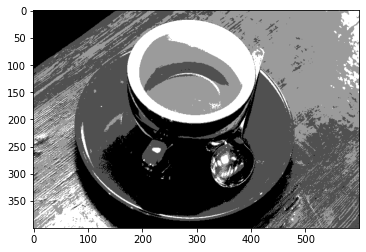

In [20]:
# With 4 clusters
n_clusters = 4

_, vals, labels = kmeans_fit(image1.reshape((-1, 1)) ,n_clusters)

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)

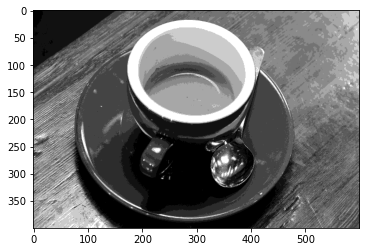

In [21]:
# With 10 clusters
n_clusters = 10

_, vals, labels = kmeans_fit(image1.reshape((-1, 1)) ,n_clusters)

img_compressed = np.choose(labels, vals)
img_compressed.shape = image1.shape # bringing back to proper image shape

plt.imshow(img_compressed, cmap=plt.cm.gray)